## INTRODUCCIÓN

PCA es un técnica de **reducción de dimensión linear** que puede utilizarse para extraer información de desde un espacio dimensional superior a otro espacio dimensional inferior. Lo que buscamos con el PCA es preservar las parte que tienen más variación entre los datos y eliminar las partes con menos variación.  

Las dimensiones no son más que características (variables) que representan los datos. Por ejemplo, una imagen de 28 X 28 tiene 784 elementos de imagen (píxeles) que son las dimensiones o variables que juntas representan esa imagen.

Una cosa importante a tener en cuenta sobre PCA es que es una técnica de reducción de dimensionalidad **no supervisada**, donde se pueden grupar los puntos de datos similares en función de la correlación que tienen las variables sin ninguna supervisión (los datos no necesitan estar etiquetados)


Nota: Cuando hablamos de **características, dimensiones y variables** nos referimos a lo mismo

![texto alternativo](https://i.ibb.co/KwFjx8j/Capture-Data-FIFA20.png)

**Dónde se puede aplicar el PCA?**



*   **Visualización de Datos:**  Un paso importante en el proceso de exploración de los datos, es la visualización de datos. Especialmente en problemas como la correlación de variables o en entender la distribución de unas pocas variables. PCA Proyecta los datos en una dimensión inferior, permitiendo visualizar los datos en un espacio 2D o 3D en una simple pasada.

*   **Entrenamiento más rápido de modelos**: Ya que PCA se basa en la reducción de dimensiones, podemos aprovechar para acelerar el train y el test de los algoritmos de  ML, ya que los algoritmos con muchas dimensiones son lentos para entrenar 



### FIFA 20 DATASET

El siguiente dataset contiene más de 100 características de los jugadores del Videjuego FIFA 20. Este dataset pertenece a Kaggle y ha sido escrapeado de la web [sofifa.com](https://sofifa.com/). El contenido del dataset es el siguiente:



1.   Posición de los jugadores con el rol en el club y en su selección nacional.
2.   Atributos del jugador con estadísticas como Ataque, Habilidad, Defena, Mentalidad, Potencial, Pierna favorita, etc.,
3.   Datos personales del jugadores como Nacionalidad, Club, Fecha de Nacimiento, Salario, Valoración


Este notebook se va a centrar en  **Visualizar las habilidades de los jugadores**



In [ ]:
#Vamos a realizar una primera exploración de los datos. Para ello, vamos a importar algunos

### Vamos a realizar una primera exploración de los datos


In [1]:
from __future__ import division

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

Importamos el fichero con el que vamos a trabajar a Google Colab.

In [2]:
fifa20 = pd.read_csv("./Datasets/players_20.csv", index_col=0)

#Vamos a explorar el tamaño del dataset
fifa20.shape

(18278, 103)

In [3]:
#echamos un primer vistazo a los datos.

fifa20.head(10)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,90,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,90,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3


Tenemos más de 100 Variables, por lo que es Normal pensar que muchas de ellas son redundantes.

## Correlación de Pearson

Una forma de responder a esto es creando una matriz de correlación utilizando un algoritmo como el de pearson.

El coeficiente de correlación de pearson tiene valores entre -1 y 1


*   Un valor cercano a 0 implica una correlación débil (si es 0 no hay ninguna correlación)
*   Un valor cercano al 1 implica una correlación fuertemente positiva
*   Un valor cercano al -1 implica una correlación fuertemente negativa

In [6]:
non_numeric_columns = fifa20.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

fifa20_numeric = fifa20.drop(non_numeric_columns, axis=1)


Non-numeric columns: Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')


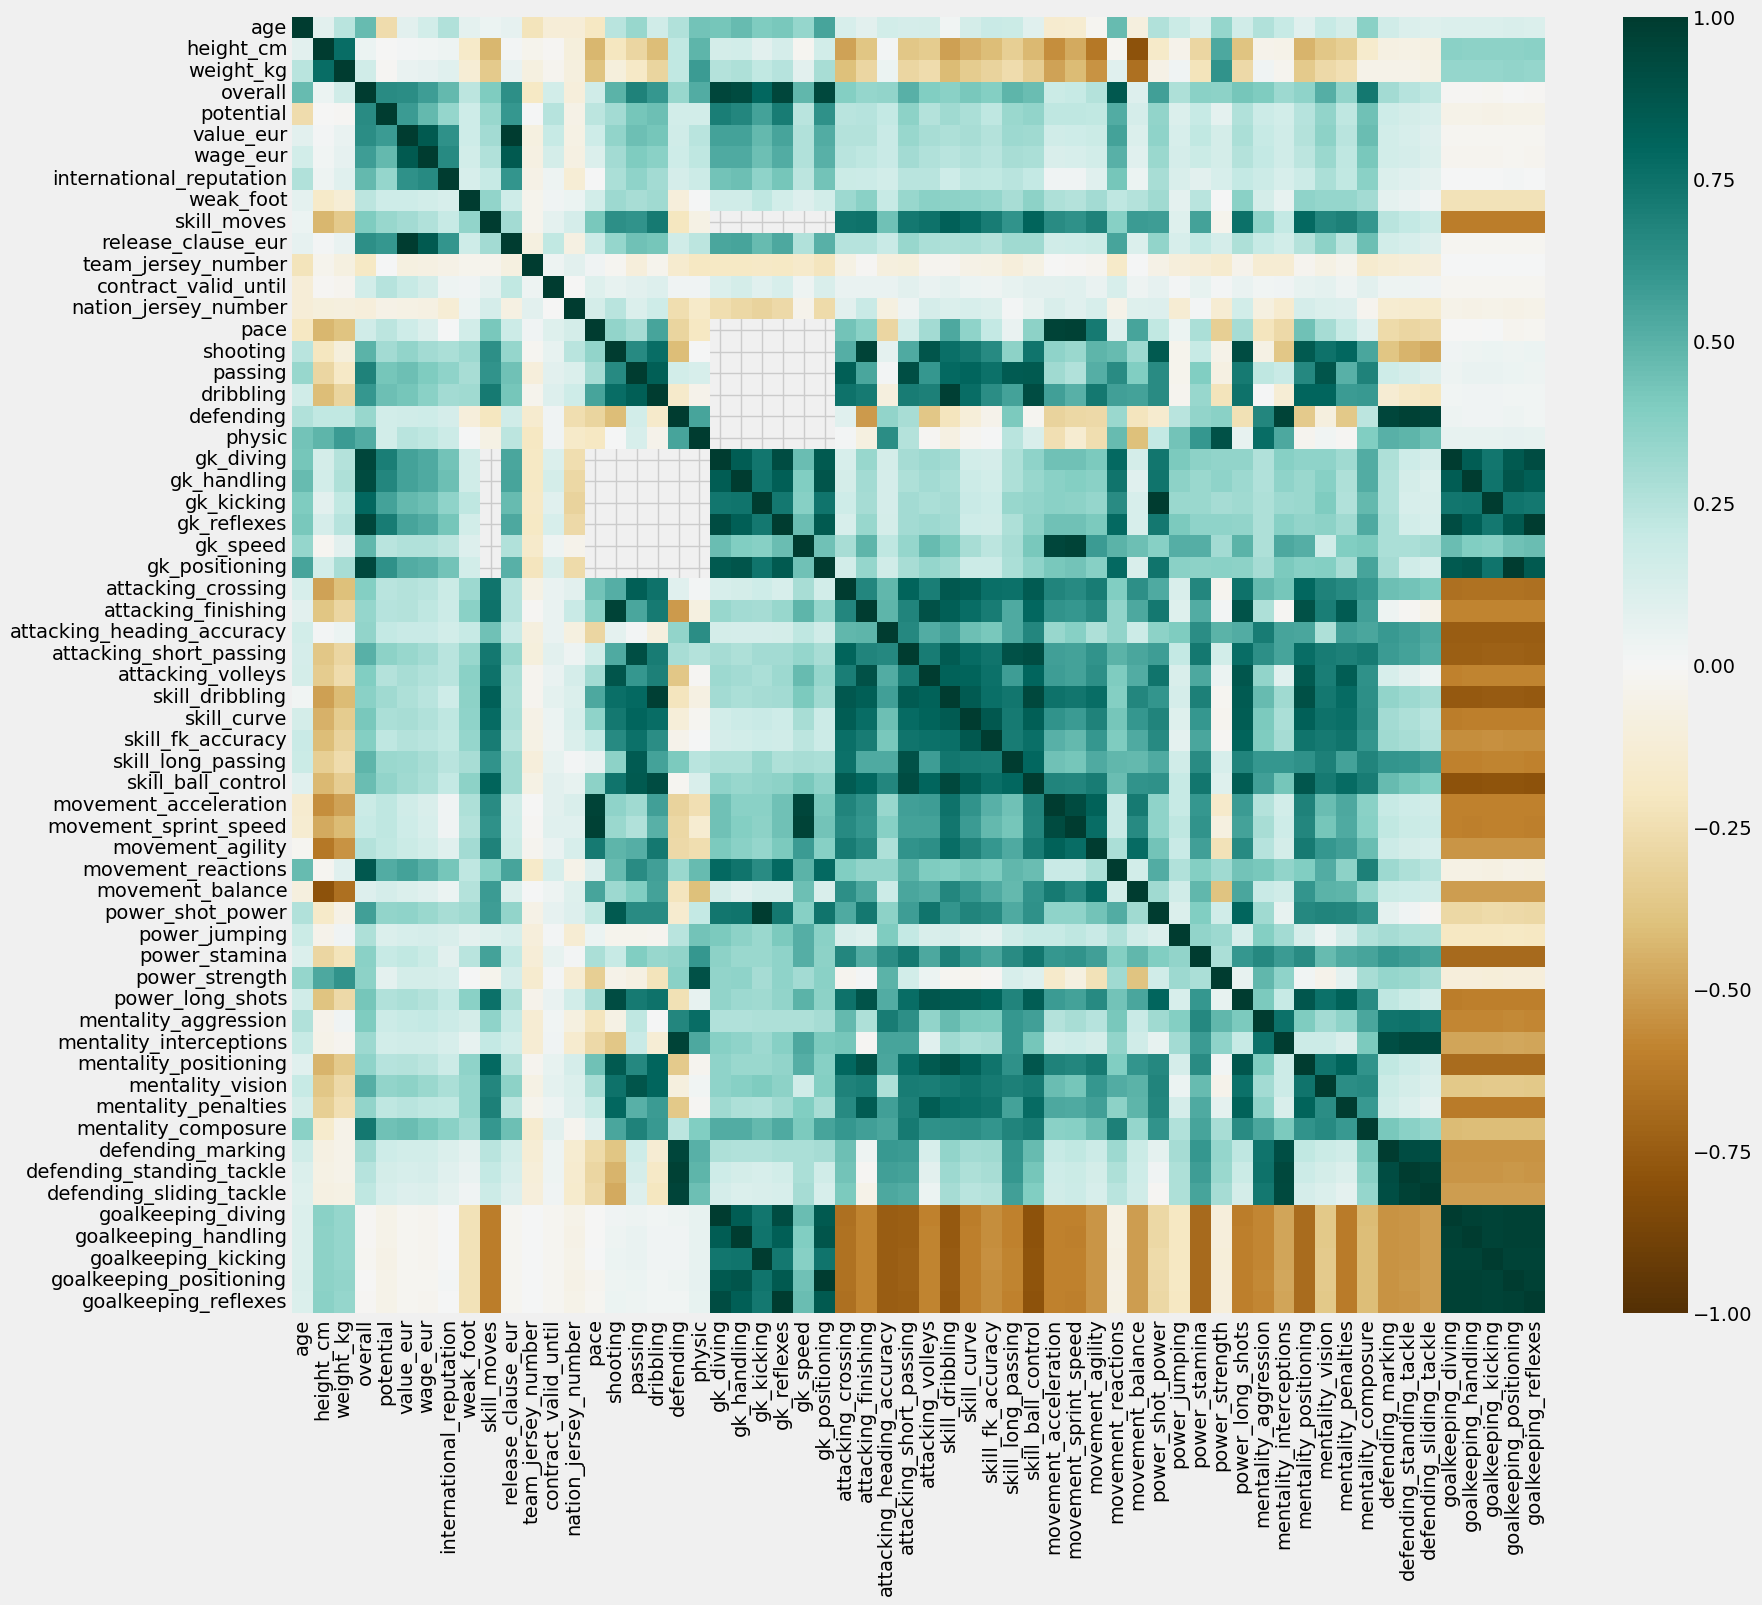

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(18,16))
cor = fifa20_numeric.corr()
sns.heatmap(cor, vmin=-1, cmap='BrBG')
plt.show()


Vemos que hay una fuerte correlación negativa abajo y otra en el lado derecho de la matriz. Estas habilidades son las de los porteros (conducción de balón, manos, posición de portero, reflejos) y están correlacionadas de manera negativa con las de los delanteros.  

Podemos también observar como las habilidades de los porteros están fuertamente correlacionadas centre ellas.




En general, independientemente de si están relacionados con los Porteros o no , existen muchas habilidades correlacionadas. Esto significa que podríamos no necesitarlas todas o podemos expresar la misma información con un conjunto de variables menor.

Como hemos comentado anteriormente, nos interesan únicamente las variables que hacen referencia a las habilidades de los jugadores. Así que vamos a crear otro dataset que contenga únicamente las columnas que nos interesan. 

### EJERCICIO. 
**Crea un dataset nuevo llamado "fifa_skills" que contenga únicamente las variables de los jugadores.**

Pista: Estas variables van desde la columna *pace* hasta la columna goalkeeping_reflexes

In [59]:
#Nos interesan las solamente las habilidades de los jugadores. Creamos un dataset Nuevo.

# Show me the number of the position of column pace
print(fifa20.columns.get_loc("pace"))

print(fifa20.columns.get_loc("goalkeeping_reflexes"))

#Cogemos los  de las columnas

# Get the columns from 30 to 76
fifa_skills = fifa20.iloc[:, 30:77]

# Otra forma de hacerlo
# Get the columns from 30 to 76
fifa_skills = fifa20.loc[:, 'pace':'goalkeeping_reflexes']

print(fifa_skills.head())



30
76
           pace  shooting  passing  dribbling  defending  physic  gk_diving   
sofifa_id                                                                     
158023     87.0      92.0     92.0       96.0       39.0    66.0        NaN  \
20801      90.0      93.0     82.0       89.0       35.0    78.0        NaN   
190871     91.0      85.0     87.0       95.0       32.0    58.0        NaN   
200389      NaN       NaN      NaN        NaN        NaN     NaN       87.0   
183277     91.0      83.0     86.0       94.0       35.0    66.0        NaN   

           gk_handling  gk_kicking  gk_reflexes  ...  mentality_penalties   
sofifa_id                                        ...                        
158023             NaN         NaN          NaN  ...                   75  \
20801              NaN         NaN          NaN  ...                   85   
190871             NaN         NaN          NaN  ...                   90   
200389            92.0        78.0         89.0  ...   

In [26]:
#Vamos a ver los tipos, ya que nos interesa que todas las columnas sean numéricas para poder representar los datos.
fifa_skills.dtypes

pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
gk_speed                      float64
gk_positioning                float64
player_traits                  object
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_dribbling                 int64
skill_curve                     int64
skill_fk_accuracy               int64
skill_long_passing              int64
skill_ball_control              int64
movement_acceleration           int64
movement_sprint_speed           int64
movement_agility                int64
movement_rea

In [27]:
#Hay una variable que es un objeto. Vamos a ver qué valores contiene.
fifa_skills['player_traits'].values

array(['Beat Offside Trap, Argues with Officials, Early Crosser, Finesse Shot, Speed Dribbler (CPU AI Only), 1-on-1 Rush, Giant Throw-in, Outside Foot Shot',
       'Long Throw-in, Selfish, Argues with Officials, Early Crosser, Speed Dribbler (CPU AI Only), Skilled Dribbling',
       'Power Free-Kick, Injury Free, Selfish, Early Crosser, Speed Dribbler (CPU AI Only), Crowd Favourite',
       ..., nan, nan, nan], dtype=object)

In [28]:
#Se tratan de rasgos del jugadores. Eliminamos la columna, aunque otra opción sería convertirla a one-hot vectors.
fifa_skills = fifa_skills.drop("player_traits", axis=1)


###EJERCICIO 

Crea otra matriz de correlación de pearson. Utilizar ahora el mapa de color llamado *coolwarm* 




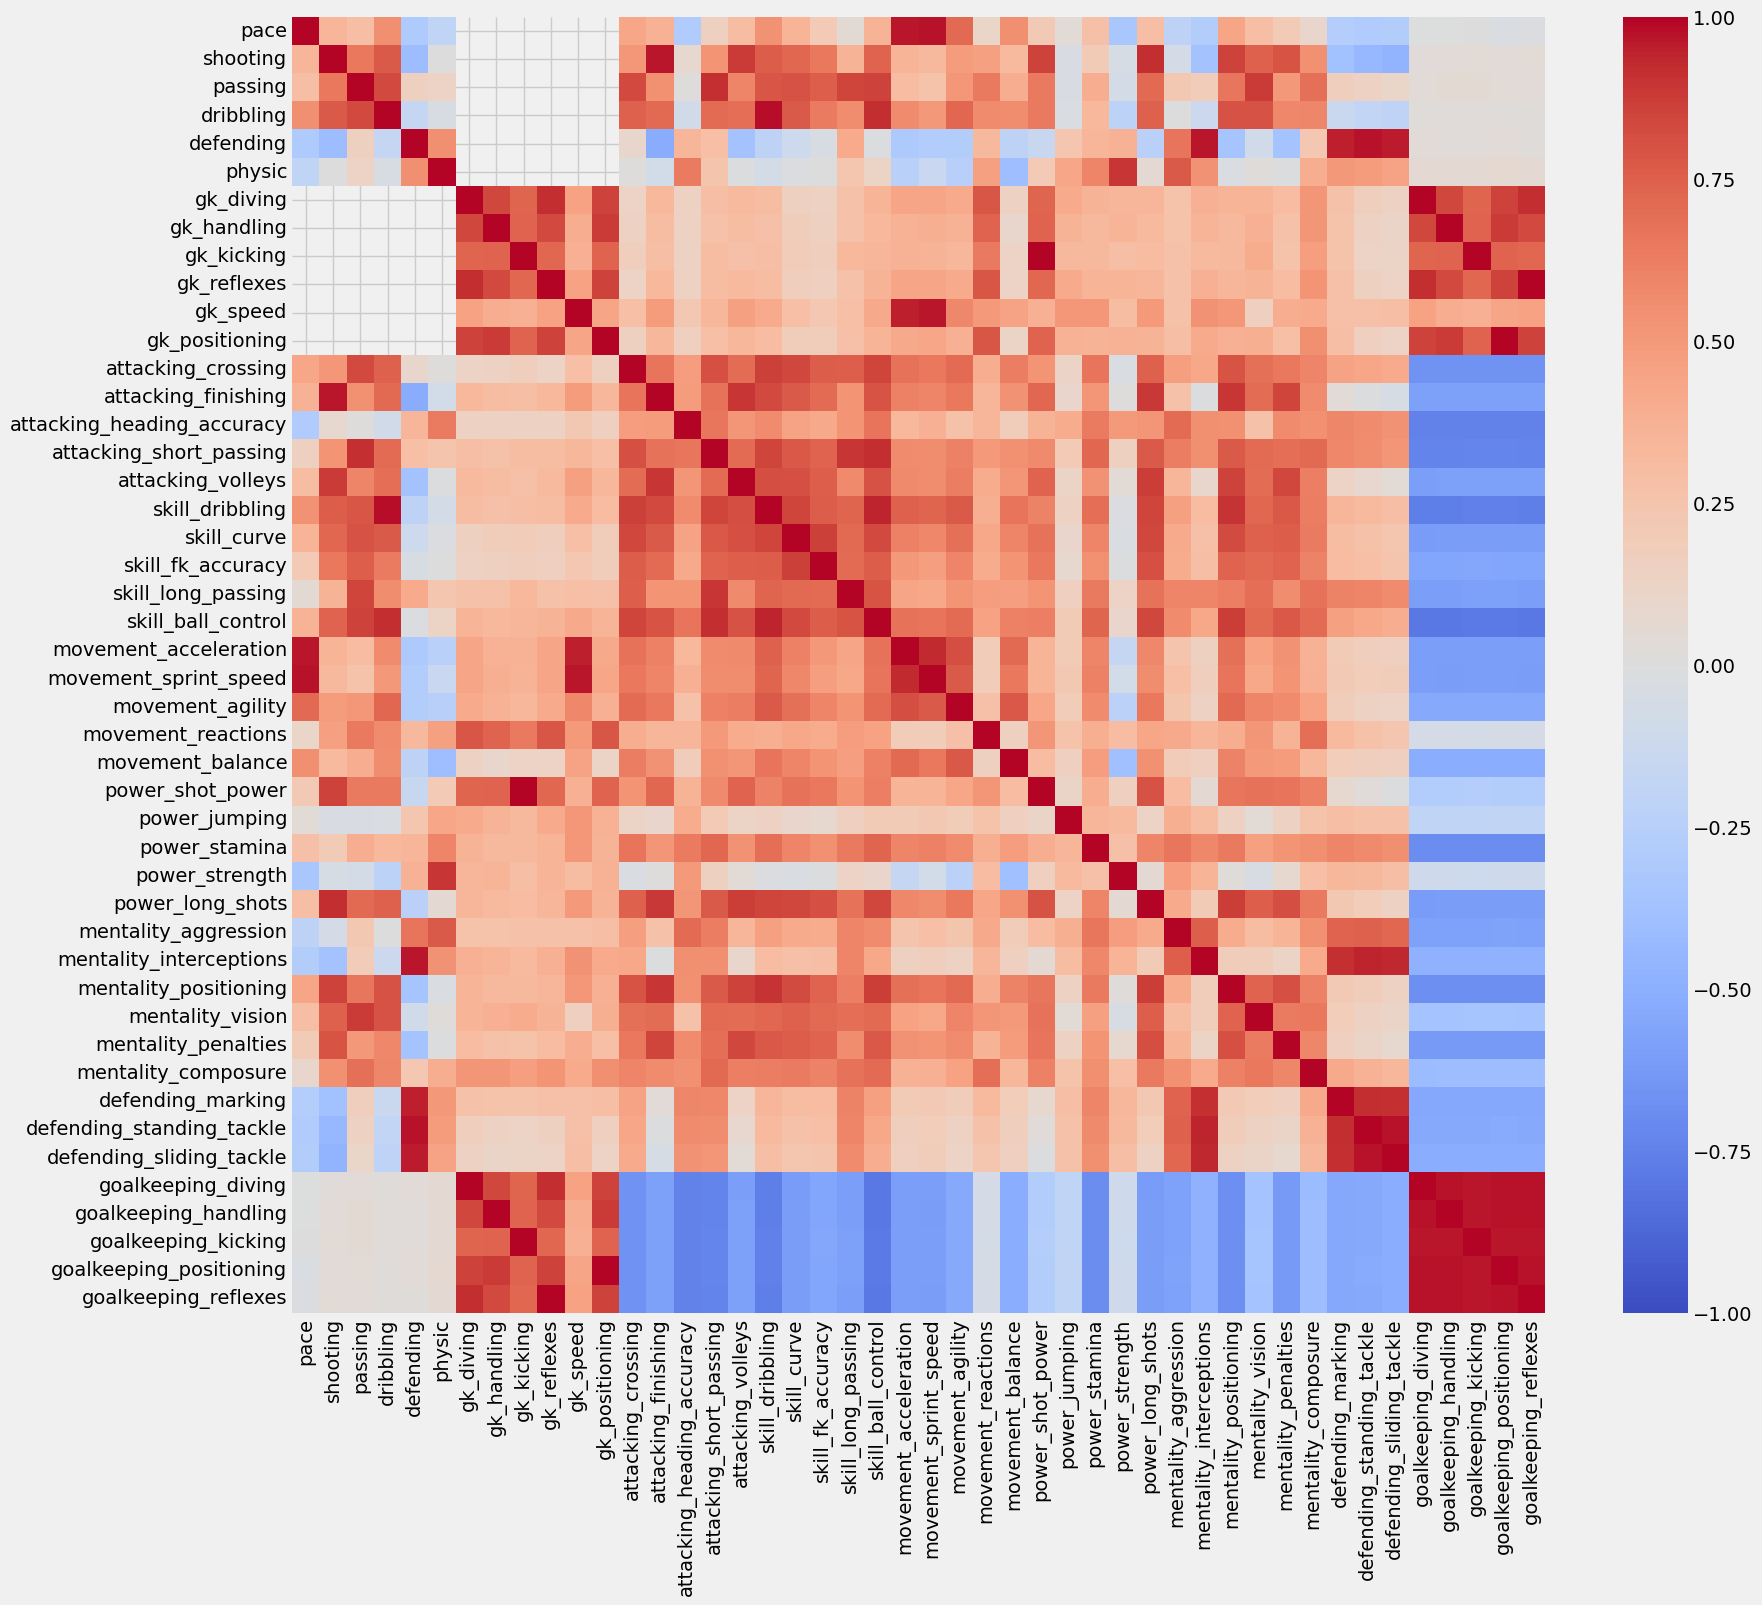

In [29]:
# Crea otra matriz de correlación de pearson. Utilizar ahora el mapa de color llamado *coolwarm* 

plt.figure(figsize=(18,16))
cor = fifa_skills.corr()
sns.heatmap(cor, vmin=-1, cmap='coolwarm')
plt.show()

**¿QUÉ VARIABLES CREES TÚ QUE PODRÍAMOS ELIMINAR?**


In [30]:
fifa_skills.columns.values

array(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_jumping',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positi

Para hacer el PCA, primero tenemos que lidiar con los missing values y los blank values.

---



In [33]:
#Vamos a ver cuantos valores  tenemos para el PCA

fifa_skills.isnull().sum()[fifa_skills.isnull().sum() > 0]


pace               2036
shooting           2036
passing            2036
dribbling          2036
defending          2036
physic             2036
gk_diving         16242
gk_handling       16242
gk_kicking        16242
gk_reflexes       16242
gk_speed          16242
gk_positioning    16242
dtype: int64

Analizando las variables, vemos que tenemos variables duplicadas.

Eliminamos las variables gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed y gk_positioning. Existe una misma variable para cada una de ellas que empieza por goalkipping_xxx







In [34]:
columns_to_delete = ['gk_diving', 'gk_diving', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'gk_handling']

fifa_skills = fifa_skills.drop(columns_to_delete, axis=1)

fifa_skills.columns.values

array(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'], dtype=object)

### EJERCICIO

Aisla los null value y mira qué características tienen todos en común.

Pista: utiliza el atributo .isnull()

In [ ]:
#Vamos a estudiar qué características tienes los jugadores con Null Value




Vemos que todos los jugadores que tienen null values, tienen una características bastante significativa en común. Como no queremos deshacernos de ellos en el dataset, ponemos los atributos Null a 0



In [35]:
fifa_skills.fillna(0, inplace=True)
fifa_skills.isnull().sum().sum()


0

In [36]:
#Le añadimos el promedio de los jugadores. Nos servirá luego para quedarnos con los 100 mejores

fifa_skills = fifa_skills.join(fifa20['overall'])



Vamos a realizar un diagrama que nos indique el número de componentes que nos explican la variabilidad en los datos.ç

In [38]:
#Escalamos los datos para hacer el diagrama que explica los componentes
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))  # Change the list to a tuple
fifa_rescaled = scaler.fit_transform(fifa_skills)


In [39]:
fifa_rescaled

array([[ 0.8125    ,  0.97849462,  1.        , ..., -0.71111111,
        -0.84615385,  1.        ],
       [ 0.875     ,  1.        ,  0.7826087 , ..., -0.71111111,
        -0.78021978,  0.95652174],
       [ 0.89583333,  0.82795699,  0.89130435, ..., -0.68888889,
        -0.78021978,  0.91304348],
       ...,
       [ 0.125     , -0.24731183, -0.04347826, ..., -0.88888889,
        -0.71428571, -1.        ],
       [ 0.22916667, -0.24731183,  0.02173913, ..., -0.73333333,
        -0.73626374, -1.        ],
       [ 0.25      , -0.31182796,  0.10869565, ..., -0.82222222,
        -0.8021978 , -1.        ]])

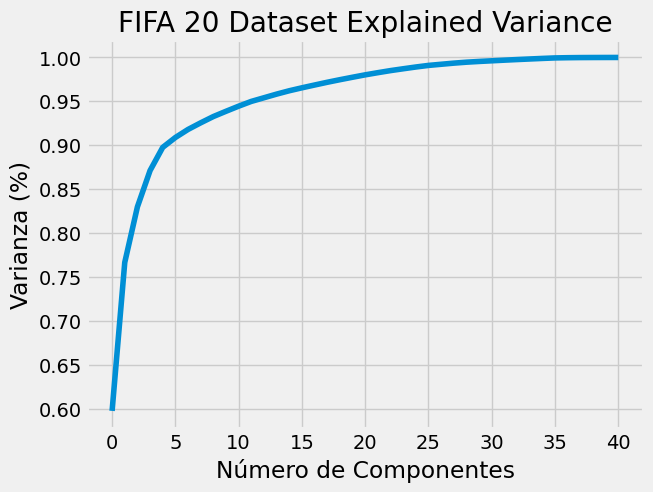

In [40]:
#Ajustando el PCA con nuestros datos
pca = PCA().fit(fifa_rescaled)
#Gráfica de la suma acumulativa de la varianza explicada
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza (%)') #para cada componente
plt.title('FIFA 20 Dataset Explained Variance')
plt.show()

El gráfico de Arriba nos está diciendo que seleccionando **únicamente 10 componentes podemos mantener el 95% de la varianza en los datos**. Con 20 podríamos explicar en un 98% el comportamiento de los datos y con 25 podríamos explicar el 100%. 

Como hemos supuesto al principio, tenemos bastantes variables que son redundantes





## TOP 100 FIFA PLAYERS

Para mostrar algunos gráficos, vamos a quedarnos únicamente con el TOP 100 de Jugadores. 

In [41]:
#Vamos a unir el nombre y las posiciones de los jugadores. Luego cogeremos el Top 100

fifa_skills = fifa_skills.join(fifa20[['short_name', 'player_positions']])
fifa_skills.head()


,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,overall,short_name,player_positions
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,...,37,26,6,11,15,14,8,94,L. Messi,"RW, CF, ST"
20801,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,...,32,24,7,11,15,14,11,93,Cristiano Ronaldo,"ST, LW"
190871,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,...,26,29,9,9,15,15,11,92,Neymar Jr,"LW, CAM"
200389,0.0,0.0,0.0,0.0,0.0,0.0,13,11,15,43,...,12,18,87,92,78,90,89,91,J. Oblak,GK
183277,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,...,27,22,11,12,6,8,8,91,E. Hazard,"LW, CF"


In [42]:
fifa_top100 = fifa_skills.sort_values('overall', ascending=False).head(100).reset_index(drop=True).copy()


In [43]:
#Comprobamos de nuevo si existen valores nulos
fifa_top100.isnull().sum().sum()

0

Vamos a utilizar una gráfica en 2 dimensiones para intentar explicar mejor los datos. Para ello utilizaremos PCA.

In [44]:
X = fifa_top100.loc[:, 'pace':'overall'].copy()

#Nos quedaremos con 2 variables, para poder 

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('decomposition', PCA(n_components=2))
    ])

In [45]:
X_transformed = pipe.fit_transform(X)
X_transformed.shape

(100, 2)

In [46]:
# Vamos a ver el porcentaje de varianza que tiene cada uno de los componentes
pipe.named_steps['decomposition'].explained_variance_ratio_

array([0.61466789, 0.16879895])

In [47]:
#Vamos a utilizar estos dos componentes para hacer un plot con un gráfico.

players_pca = pd.DataFrame(X_transformed, columns=['first_component', 'second_component'])



players_pca = players_pca.join(fifa_top100['short_name'])

In [48]:
labels = players_pca['short_name'].head(30)
labels

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3              J. Oblak
4             E. Hazard
5          K. De Bruyne
6         M. ter Stegen
7           V. van Dijk
8             L. Modrić
9              M. Salah
10            S. Agüero
11         A. Griezmann
12      Sergio Busquets
13       R. Lewandowski
14            L. Suárez
15         Sergio Ramos
16             N. Kanté
17         G. Chiellini
18               De Gea
19              Alisson
20              H. Kane
21         K. Koulibaly
22            K. Mbappé
23            H. Lloris
24              S. Mané
25        P. Aubameyang
26              M. Reus
27             T. Kroos
28             D. Godín
29            E. Cavani
Name: short_name, dtype: object

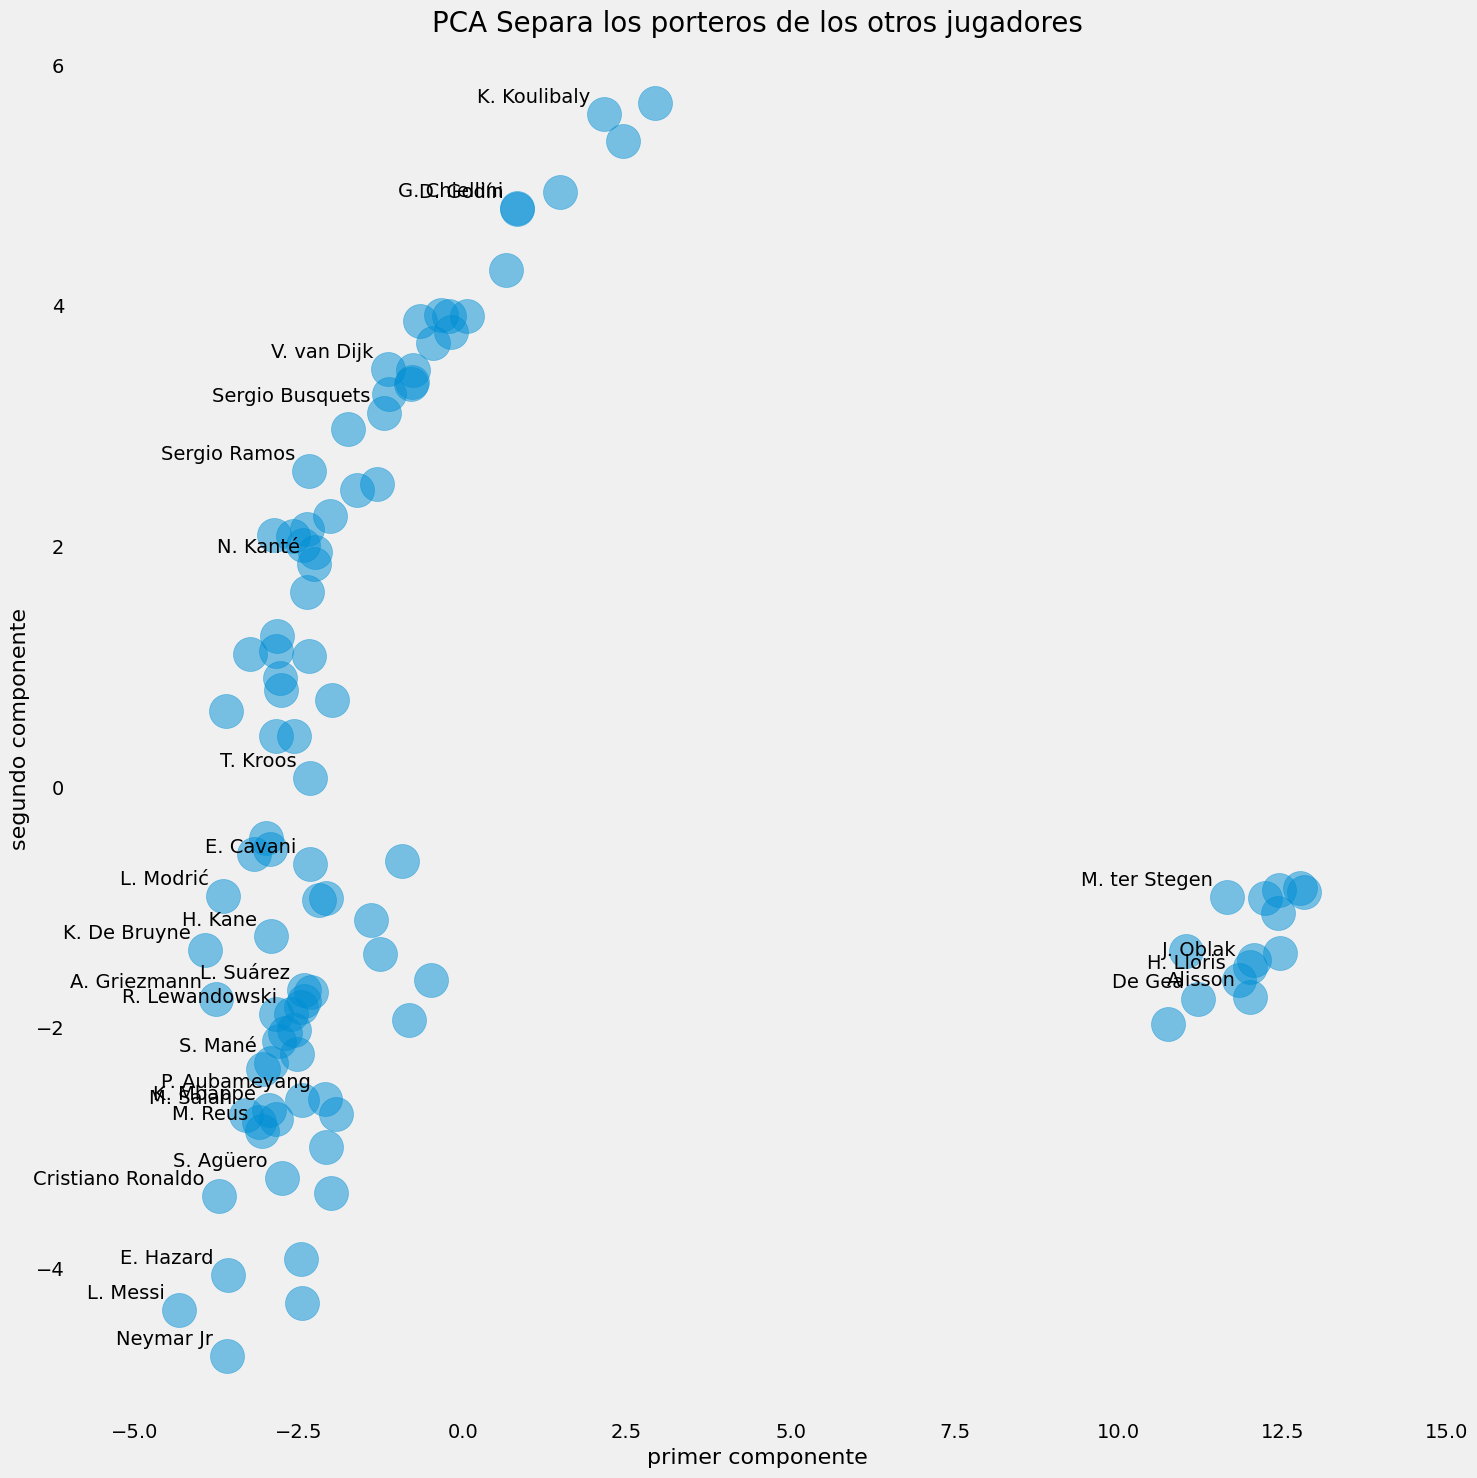

In [49]:
##Plot the first 30 elements

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

ax.scatter(players_pca.first_component, players_pca.second_component, s=600, alpha=0.5)

ax.set_title('PCA Separa los porteros de los otros jugadores', size=20)
ax.set_xlabel('primer componente', size=16)
ax.set_ylabel('segundo componente', size=16)
ax.tick_params(labelsize=14)
ax.set_xlim(-6, 15)
ax.grid(False)

for label, x, y in zip(labels,
                       players_pca.first_component,
                       players_pca.second_component):
    ax.annotate(label, xy=(x, y), xytext=(-10, 5),
               textcoords='offset points', ha='right', va='bottom')
    
fig.tight_layout()

Con PCA, vamos a intentar diferenciar entre los jugadores de campo y los jugadores de 

## EJERCICIO

Utilizando las componentes de arriba, intenta encontrar diferencia entre únicamente los jugadores de campo delanteros, centrocampistas y defensas

In [52]:
# Delete players that in the previous plot have a value greater than 5 in the first component
otros_jugadores = players_pca[players_pca.first_component < 5]






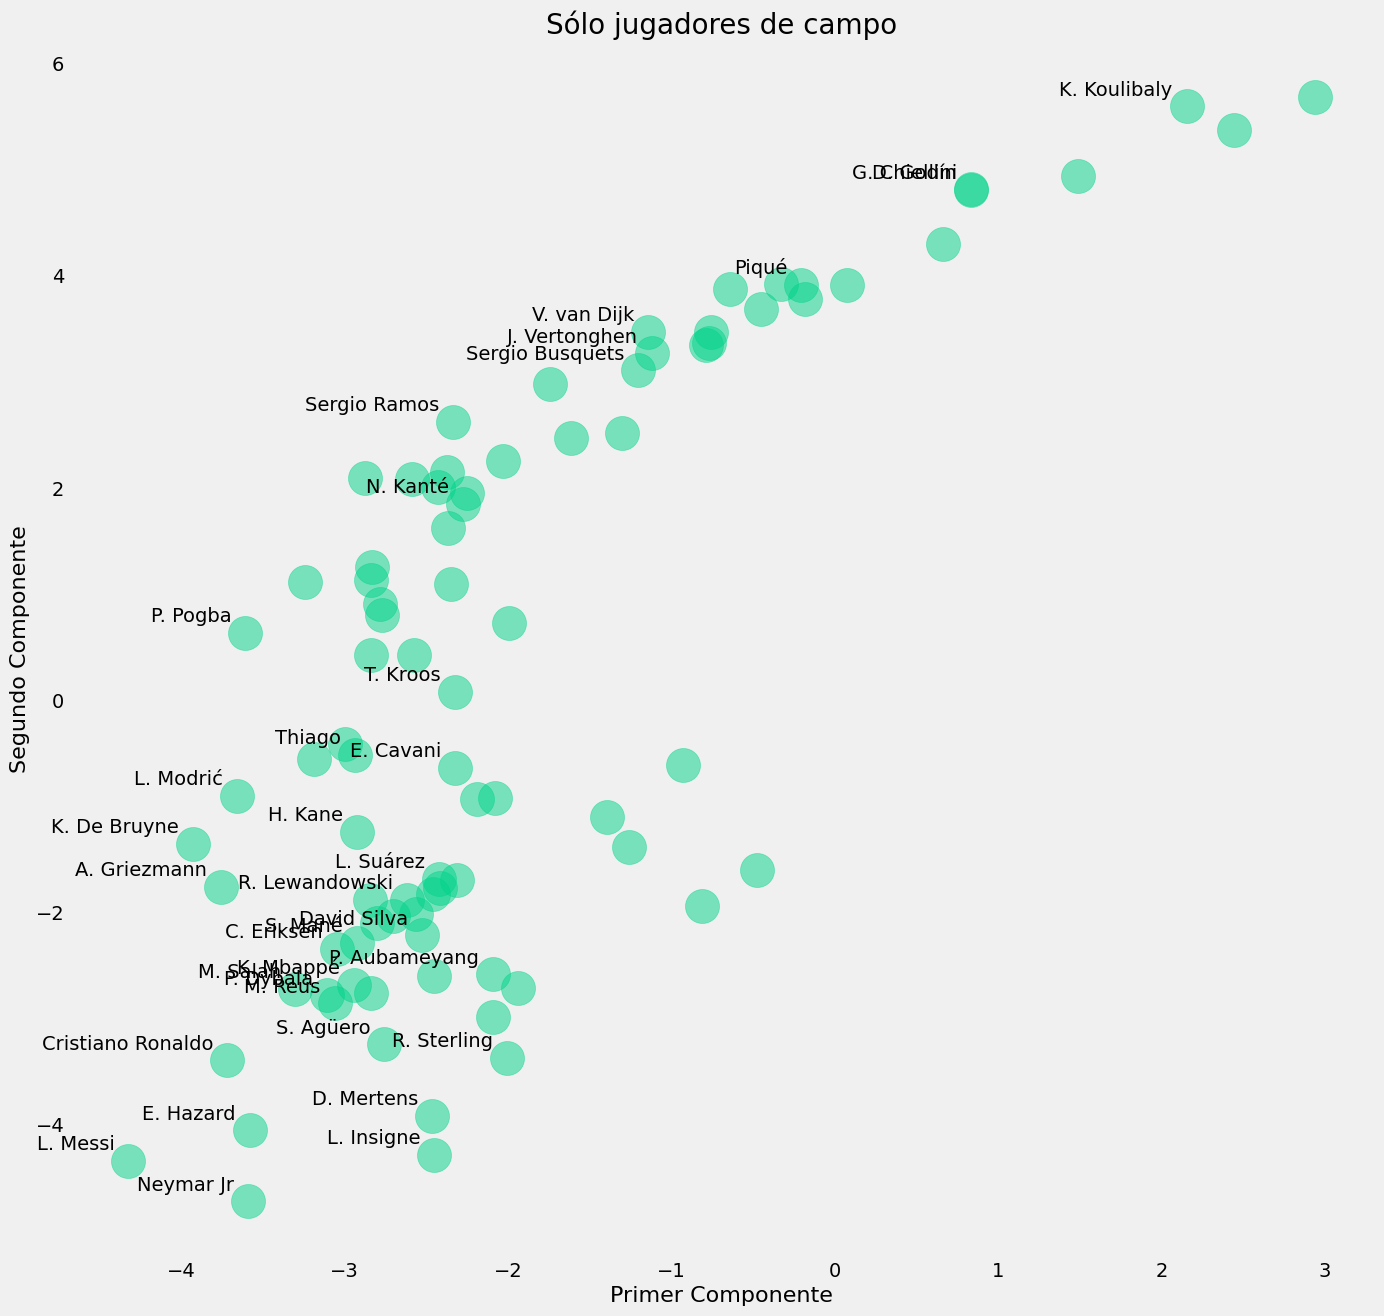

In [53]:
labels = otros_jugadores['short_name'].head(35)



fig, ax = plt.subplots(1, 1, figsize=(15, 15))

ax.scatter(otros_jugadores.first_component, otros_jugadores.second_component, s=600,
           alpha=0.5, c='#00D48A')

ax.set_title('Sólo jugadores de campo', size=20)
ax.set_xlabel('Primer Componente', size=16)
ax.set_ylabel('Segundo Componente', size=16)
ax.tick_params(labelsize=14)
ax.grid(False)



for label, x, y in zip(labels,
                       otros_jugadores.first_component,
                       otros_jugadores.second_component):
    ax.annotate(label, xy=(x, y), xytext=(-10, 5),
               textcoords='offset points', ha='right', va='bottom')
    



ALgunas conclusiones que sacamos es que los defensas están bastante separados de los delanteros.


Los jugadores más ofensivos están en la esquina inferior izquierda y los jugadores más defensivos están en la esquina superior derecha. 


In [54]:
from IPython.display import clear_output
clear_output()
